# EJERCICIOS

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,confusion_matrix
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from scipy.stats import reciprocal
from sklearn.pipeline import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [34]:
loan_data = pd.read_csv("loan_data.csv")

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [35]:
loan_data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [36]:
loan_data.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [37]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [38]:
loan_data["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [39]:
print(loan_data['not.fully.paid'].value_counts())

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


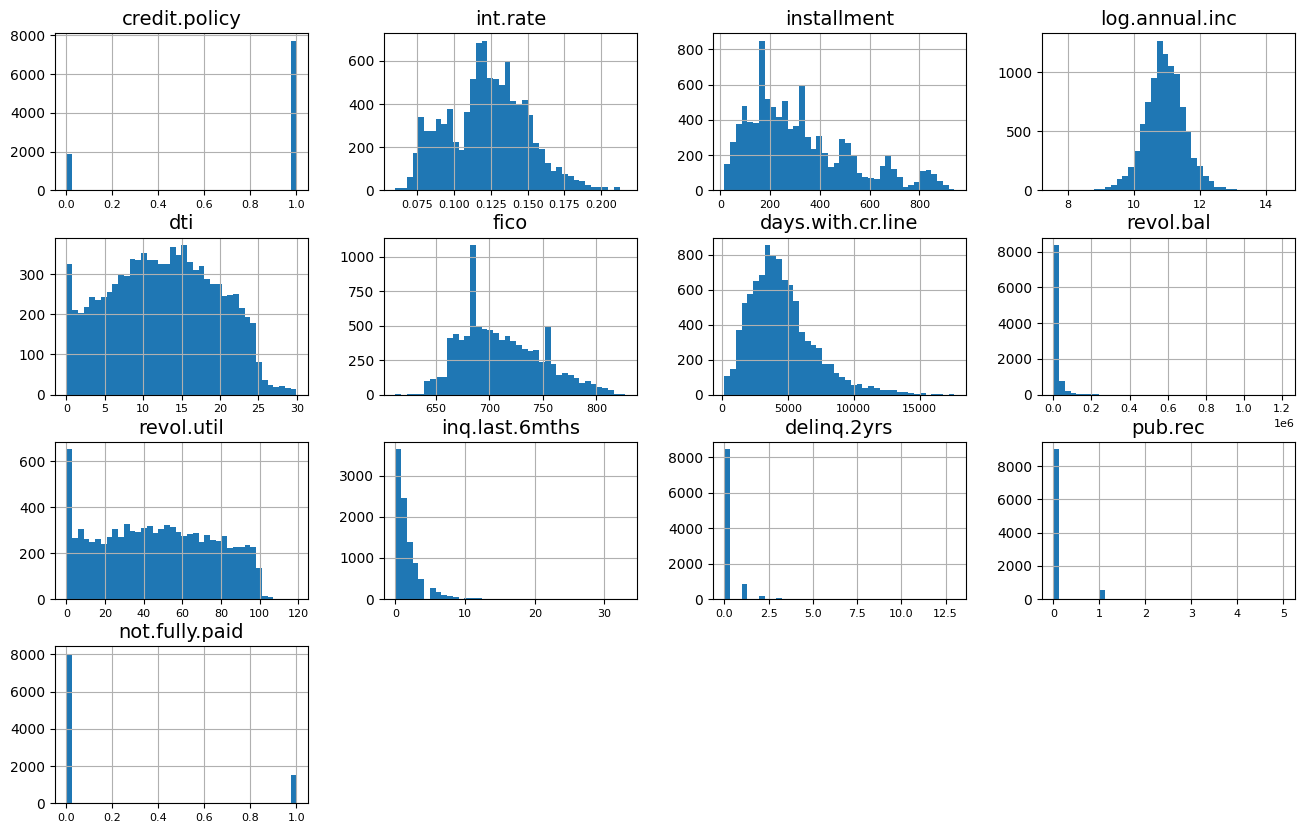

In [40]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
loan_data.hist(bins=40, figsize=(16, 10))
plt.show()

In [41]:
matriz_correlacion = loan_data.corr(numeric_only=True)
matriz_correlacion.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [42]:
# Hay gráficos vacios y que me dan poca información, ya que me interesa not fully paid, voy a eliminar los que menos correlación tienen con esta columna
loan_data_min = loan_data.drop(columns=["installment","pub.rec","dti","delinq.2yrs","days.with.cr.line","log.annual.inc","revol.bal"])
loan_data_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit.policy   9578 non-null   int64  
 1   purpose         9578 non-null   object 
 2   int.rate        9578 non-null   float64
 3   fico            9578 non-null   int64  
 4   revol.util      9578 non-null   float64
 5   inq.last.6mths  9578 non-null   int64  
 6   not.fully.paid  9578 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 523.9+ KB


In [43]:
matriz_correlacion = loan_data_min.corr(numeric_only=True)
matriz_correlacion.style.background_gradient()

,credit.policy,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid
credit.policy,1.000000,-0.294089,0.348319,-0.104095,-0.535511,-0.158119
int.rate,-0.294089,1.000000,-0.714821,0.464837,0.202780,0.159552
fico,0.348319,-0.714821,1.000000,-0.541289,-0.185293,-0.149666
revol.util,-0.104095,0.464837,-0.541289,1.000000,-0.013880,0.082088
inq.last.6mths,-0.535511,0.202780,-0.185293,-0.013880,1.000000,0.149452
not.fully.paid,-0.158119,0.159552,-0.149666,0.082088,0.149452,1.000000


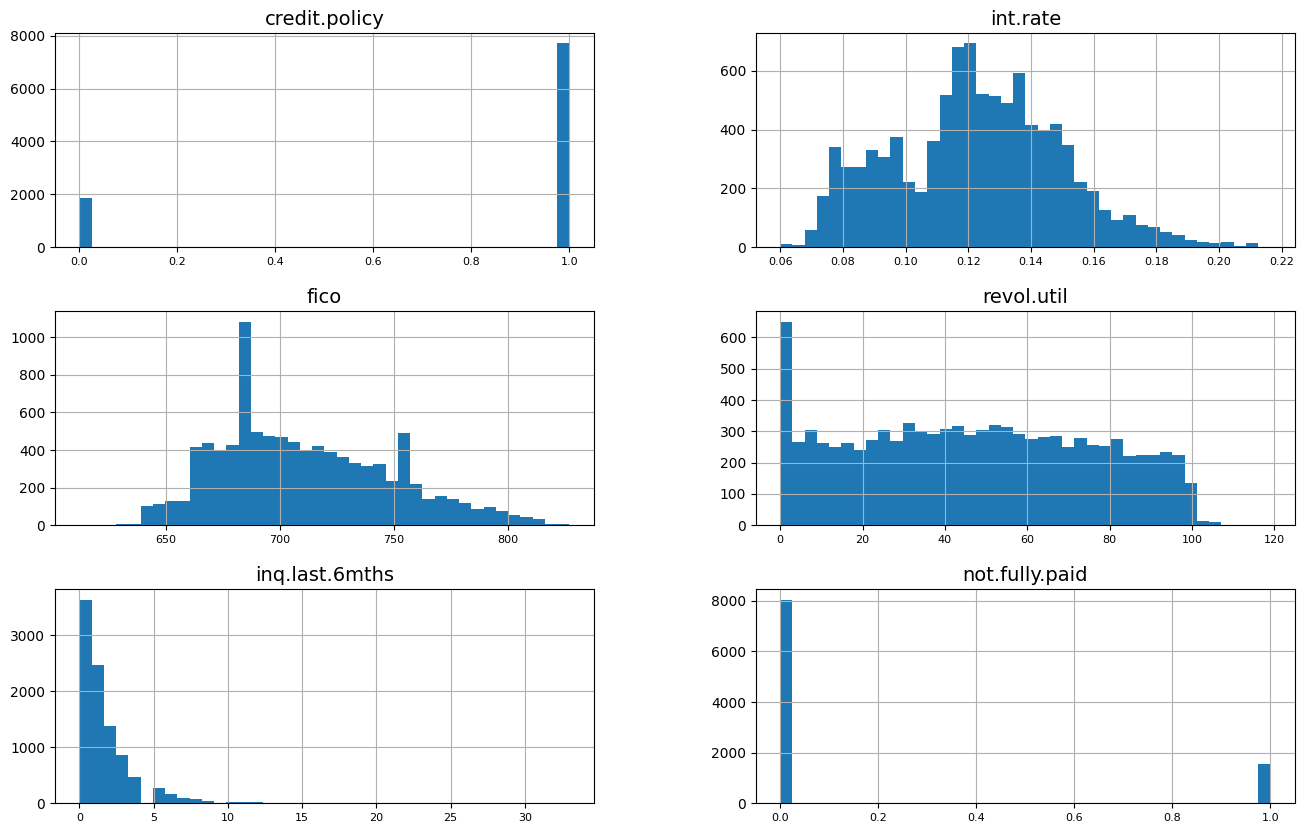

In [44]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
loan_data_min.hist(bins=40, figsize=(16, 10))
plt.show()

#### DIVIDIR LOS DATOS

In [45]:
# VLa variable a por la que voy es not fully paid
X = loan_data_min.drop('not.fully.paid', axis=1)

y = loan_data_min['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)


#### PREPARAR LOS DATOS

KeyError: '[9, 15, 16, 34, 37, 41, 46, 49, 51, 53, 54, 55, 56, 58, 63, 67, 70, 71, 72, 73, 74, 83, 89, 94, 99, 100, 106, 110, 114, 116, 124, 125, 128, 134, 140, 148, 150, 151, 152, 155, 158, 167, 169, 186, 189, 196, 200, 204, 206, 216, 227, 234, 259, 263, 265, 268, 272, 279, 282, 286, 291, 303, 314, 315, 318, 331, 332, 335, 336, 354, 358, 360, 364, 370, 371, 372, 374, 378, 380, 390, 398, 410, 418, 420, 426, 430, 437, 442, 443, 452, 456, 465, 466, 472, 478, 489, 501, 504, 511, 515, 517, 518, 524, 531, 533, 537, 539, 542, 543, 553, 569, 573, 577, 578, 581, 582, 587, 595, 597, 603, 616, 618, 625, 634, 635, 637, 638, 643, 656, 660, 662, 663, 668, 671, 675, 692, 702, 704, 705, 710, 718, 724, 748, 750, 766, 768, 773, 774, 775, 777, 781, 782, 784, 786, 787, 789, 791, 795, 799, 804, 808, 809, 811, 814, 819, 820, 822, 829, 834, 845, 847, 848, 851, 857, 865, 866, 867, 868, 873, 874, 879, 880, 884, 892, 896, 906, 909, 922, 923, 934, 943, 946, 949, 953, 955, 959, 969, 971, 978, 979, 984, 987, 995, 996, 1001, 1004, 1005, 1015, 1021, 1033, 1035, 1040, 1041, 1050, 1056, 1060, 1066, 1067, 1069, 1074, 1091, 1101, 1102, 1106, 1110, 1119, 1120, 1127, 1131, 1136, 1137, 1140, 1141, 1145, 1159, 1160, 1161, 1165, 1180, 1182, 1183, 1184, 1185, 1193, 1195, 1201, 1214, 1219, 1220, 1221, 1225, 1226, 1228, 1234, 1238, 1244, 1250, 1264, 1268, 1282, 1290, 1297, 1317, 1322, 1330, 1335, 1336, 1341, 1359, 1363, 1369, 1371, 1372, 1376, 1383, 1386, 1387, 1388, 1401, 1411, 1415, 1418, 1420, 1424, 1432, 1436, 1438, 1443, 1452, 1457, 1458, 1463, 1465, 1467, 1472, 1476, 1480, 1486, 1487, 1489, 1491, 1493, 1509, 1510, 1511, 1513, 1524, 1535, 1553, 1554, 1560, 1570, 1578, 1580, 1586, 1588, 1590, 1594, 1595, 1599, 1602, 1611, 1617, 1620, 1627, 1631, 1634, 1648, 1659, 1662, 1673, 1675, 1677, 1690, 1692, 1701, 1705, 1709, 1713, 1720, 1721, 1722, 1744, 1748, 1754, 1762, 1768, 1769, 1770, 1772, 1786, 1808, 1809, 1815, 1818, 1819, 1825, 1828, 1846, 1849, 1852, 1859, 1860, 1864, 1875, 1876, 1882, 1884, 1889, 1894, 1899, 1900, 1903, 1906, 1913, 1915, 1921, 1937, 1941, 1952, 1953, 1964, 1966, 1974, 1979, 1980, 1990, 1996, 1999, 2004, 2006, 2009, 2012, 2015, 2018, 2021, 2024, 2028, 2031, 2033, 2037, 2038, 2063, 2070, 2078, 2079, 2080, 2082, 2087, 2090, 2095, 2106, 2112, 2113, 2118, 2134, 2141, 2143, 2146, 2154, 2158, 2165, 2168, 2169, 2172, 2181, 2184, 2191, 2193, 2195, 2196, 2209, 2217, 2220, 2227, 2229, 2236, 2237, 2241, 2248, 2249, 2251, 2275, 2278, 2281, 2282, 2293, 2299, 2300, 2303, 2310, 2313, 2323, 2324, 2335, 2337, 2348, 2349, 2352, 2362, 2371, 2377, 2385, 2386, 2397, 2400, 2413, 2415, 2422, 2423, 2426, 2427, 2436, 2437, 2438, 2445, 2451, 2452, 2454, 2456, 2461, 2464, 2477, 2481, 2483, 2490, 2496, 2498, 2500, 2506, 2513, 2519, 2523, 2525, 2533, 2535, 2537, 2540, 2543, 2545, 2546, 2547, 2550, 2558, 2559, 2564, 2565, 2568, 2584, 2585, 2588, 2594, 2596, 2607, 2608, 2611, 2618, 2619, 2629, 2637, 2639, 2644, 2646, 2649, 2652, 2657, 2663, 2669, 2681, 2689, 2695, 2702, 2704, 2705, 2706, 2709, 2711, 2731, 2732, 2734, 2737, 2739, 2757, 2760, 2764, 2768, 2774, 2778, 2788, 2790, 2793, 2810, 2811, 2813, 2817, 2818, 2824, 2827, 2838, 2840, 2848, 2859, 2860, 2866, 2873, 2877, 2878, 2882, 2885, 2887, 2894, 2900, 2914, 2917, 2925, 2928, 2945, 2952, 2962, 2967, 2968, 2971, 2974, 2982, 2985, 2986, 2992, 2999, 3008, 3010, 3012, 3014, 3019, 3020, 3024, 3037, 3039, 3040, 3044, 3055, 3057, 3068, 3072, 3081, 3087, 3093, 3099, 3103, 3107, 3108, 3111, 3122, 3129, 3144, 3155, 3156, 3164, 3165, 3166, 3172, 3173, 3175, 3176, 3177, 3180, 3192, 3196, 3199, 3203, 3206, 3210, 3211, 3239, 3241, 3242, 3244, 3247, 3252, 3254, 3256, 3262, 3269, 3280, 3286, 3311, 3334, 3336, 3337, 3338, 3339, 3342, 3344, 3363, 3369, 3376, 3387, 3412, 3416, 3418, 3428, 3444, 3449, 3451, 3452, 3457, 3465, 3467, 3468, 3473, 3476, 3477, 3487, 3488, 3493, 3504, 3510, 3521, 3542, 3543, 3552, 3557, 3561, 3563, 3565, 3580, 3584, 3591, 3603, 3607, 3610, 3612, 3621, 3624, 3631, 3638, 3639, 3642, 3645, 3649, 3651, 3654, 3659, 3663, 3668, 3670, 3684, 3696, 3705, 3714, 3734, 3745, 3752, 3756, 3757, 3760, 3762, 3767, 3770, 3776, 3786, 3793, 3804, 3806, 3816, 3820, 3824, 3838, 3845, 3848, 3856, 3862, 3865, 3870, 3871, 3874, 3876, 3880, 3886, 3889, 3895, 3898, 3905, 3906, 3908, 3915, 3927, 3935, 3938, 3939, 3946, 3950, 3953, 3957, 3958, 3964, 3975, 3977, 3978, 3980, 3982, 3987, 3988, 3991, 3999, 4001, 4007, 4015, 4029, 4041, 4042, 4044, 4048, 4052, 4062, 4066, 4068, 4079, 4083, 4091, 4092, 4094, 4111, 4114, 4126, 4132, 4135, 4139, 4146, 4154, 4158, 4162, 4168, 4170, 4175, 4182, 4186, 4193, 4202, 4203, 4206, 4208, 4214, 4216, 4220, 4227, 4238, 4249, 4250, 4251, 4256, 4262, 4263, 4264, 4272, 4283, 4285, 4288, 4291, 4294, 4303, 4306, 4322, 4325, 4329, 4333, 4334, 4337, 4341, 4343, 4344, 4346, 4352, 4355, 4357, 4359, 4364, 4366, 4367, 4373, 4379, 4380, 4384, 4388, 4391, 4399, 4404, 4409, 4411, 4414, 4429, 4435, 4439, 4441, 4444, 4445, 4446, 4449, 4450, 4451, 4452, 4467, 4468, 4473, 4477, 4479, 4481, 4483, 4490, 4491, 4500, 4509, 4511, 4515, 4517, 4521, 4524, 4527, 4536, 4551, 4555, 4556, 4564, 4571, 4579, 4580, 4585, 4589, 4593, 4595, 4605, 4611, 4613, 4616, 4618, 4622, 4628, 4633, 4636, 4638, 4641, 4645, 4649, 4652, 4655, 4658, 4662, 4664, 4666, 4669, 4670, 4677, 4682, 4684, 4685, 4692, 4698, 4699, 4706, 4715, 4734, 4743, 4744, 4747, 4748, 4750, 4751, 4753, 4755, 4756, 4762, 4768, 4772, 4775, 4785, 4786, 4787, 4789, 4791, 4794, 4810, 4819, 4825, 4841, 4848, 4849, 4851, 4853, 4878, 4879, 4888, 4891, 4896, 4899, 4902, 4905, 4909, 4915, 4919, 4922, 4941, 4944, 4945, 4956, 4963, 4966, 4975, 4982, 4991, 4992, 4995, 4996, 5001, 5013, 5020, 5032, 5034, 5035, 5036, 5039, 5041, 5043, 5046, 5048, 5054, 5065, 5066, 5069, 5071, 5084, 5091, 5105, 5124, 5127, 5129, 5131, 5132, 5134, 5138, 5139, 5148, 5156, 5157, 5158, 5171, 5172, 5173, 5174, 5176, 5177, 5184, 5189, 5195, 5208, 5209, 5225, 5232, 5236, 5241, 5247, 5249, 5252, 5253, 5254, 5255, 5257, 5262, 5275, 5278, 5279, 5281, 5287, 5288, 5291, 5293, 5297, 5300, 5308, 5312, 5322, 5326, 5327, 5333, 5335, 5338, 5340, 5359, 5360, 5366, 5369, 5373, 5374, 5378, 5380, 5393, 5394, 5398, 5407, 5412, 5414, 5416, 5425, 5427, 5431, 5439, 5445, 5451, 5452, 5463, 5464, 5468, 5469, 5471, 5474, 5482, 5493, 5495, 5502, 5513, 5520, 5532, 5538, 5540, 5541, 5556, 5572, 5574, 5575, 5581, 5584, 5586, 5598, 5600, 5609, 5615, 5627, 5638, 5639, 5641, 5642, 5643, 5644, 5646, 5647, 5650, 5655, 5660, 5661, 5662, 5666, 5669, 5678, 5680, 5683, 5689, 5700, 5703, 5708, 5710, 5713, 5714, 5715, 5718, 5729, 5735, 5737, 5742, 5744, 5749, 5758, 5761, 5764, 5773, 5774, 5785, 5788, 5790, 5809, 5812, 5816, 5818, 5821, 5831, 5833, 5836, 5837, 5838, 5849, 5860, 5867, 5872, 5873, 5876, 5883, 5886, 5893, 5896, 5907, 5912, 5914, 5918, 5923, 5928, 5933, 5936, 5938, 5939, 5946, 5947, 5955, 5965, 5967, 5972, 5973, 5975, 5980, 5983, 5988, 5989, 5991, 5997, 6014, 6015, 6018, 6026, 6041, 6049, 6055, 6056, 6058, 6061, 6064, 6079, 6085, 6087, 6094, 6101, 6102, 6104, 6109, 6114, 6115, 6116, 6143, 6144, 6145, 6159, 6160, 6164, 6170, 6174, 6188, 6190, 6197, 6198, 6199, 6205, 6206, 6207, 6211, 6215, 6223, 6226, 6228, 6233, 6237, 6238, 6241, 6244, 6247, 6248, 6255, 6256, 6259, 6260, 6265, 6273, 6282, 6290, 6301, 6305, 6307, 6310, 6311, 6324, 6335, 6336, 6339, 6342, 6348, 6373, 6375, 6379, 6384, 6391, 6402, 6404, 6405, 6418, 6420, 6421, 6425, 6428, 6429, 6434, 6439, 6442, 6445, 6463, 6471, 6475, 6481, 6484, 6486, 6493, 6495, 6499, 6509, 6511, 6520, 6521, 6526, 6528, 6530, 6534, 6536, 6539, 6545, 6548, 6555, 6562, 6564, 6567, 6571, 6573, 6580, 6588, 6592, 6593, 6600, 6604, 6608, 6627, 6631, 6639, 6642, 6650, 6659, 6662, 6663, 6664, 6666, 6670, 6687, 6699, 6702, 6705, 6710, 6727, 6731, 6739, 6748, 6750, 6753, 6754, 6757, 6764, 6780, 6782, 6787, 6789, 6796, 6799, 6800, 6806, 6820, 6821, 6823, 6828, 6843, 6855, 6859, 6861, 6867, 6868, 6869, 6871, 6874, 6878, 6879, 6882, 6887, 6889, 6892, 6894, 6897, 6898, 6912, 6913, 6922, 6923, 6924, 6937, 6944, 6946, 6950, 6953, 6956, 6957, 6961, 6966, 6975, 6987, 6989, 6990, 6993, 7001, 7005, 7006, 7008, 7012, 7014, 7015, 7021, 7022, 7024, 7035, 7036, 7044, 7051, 7053, 7054, 7055, 7057, 7059, 7062, 7072, 7073, 7081, 7089, 7090, 7093, 7095, 7098, 7100, 7106, 7107, 7108, 7111, 7120, 7128, 7129, 7130, 7134, 7136, 7139, 7140, 7152, 7156, 7169, 7180, 7181, 7186, 7190, 7213, 7244, 7251, 7257, 7268, 7269, 7273, 7277, 7282, 7288, 7290, 7291, 7294, 7306, 7307, 7312, 7318, 7321, 7326, 7327, 7344, 7346, 7355, 7363, 7364, 7368, 7369, 7377, 7381, 7383, 7384, 7386, 7393, 7399, 7400, 7408, 7410, 7412, 7416, 7417, 7423, 7425, 7426, 7431, 7432, 7440, 7443, 7445, 7459, 7468, 7472, 7475, 7478, 7480, 7484] not in index'

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
# Cargar los datos
data = pd.read_csv("Datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

FileNotFoundError: [Errno 2] No such file or directory: 'Datos/tmdb_5000_movies.csv'

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)


In [ ]:
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?